# Niranjan Poudel (Niranjan111@hotmail.com)

## Assignment 2 (Linear regression)

### Part 1 Exploratory data analysis

In [1]:
# Importing the required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Niranjan.p\\Documents'

### Importing the data set

In [3]:
my_data = pd.read_csv(r"C:\Users\Niranjan.p\Documents\GitHub\Machine_Learning_USU\Spring 2020\HW data source\HW regression- NY property sale\nyc-rolling-sales.csv")
pd.set_option('display.max_rows',100) ## maximum number of rows the panda will display
pd.set_option('display.max_columns',30)### for the visualization of all the columns
my_data.head(15)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,,10009,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,10009,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,,10009,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,,10009,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,10009,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


### Inspecting data, changing and managing where required

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

### The unamned column is just the serial number for differnt borough so removing it

In [5]:
del my_data['Unnamed: 0']

### Inspecting a colum EASE-MENT which looks like a empty one

In [6]:
my_data['EASE-MENT'].describe()

count     84548
unique        1
top            
freq      84548
Name: EASE-MENT, dtype: object

The result above shows that there is only 1 type of information in the whole column and is same for all the rows(84585) so its basically empty.

In [7]:
del my_data['EASE-MENT']

### Checking for duplicated rows

In [8]:
sum(my_data.duplicated())

765

### Removing the duplicated datas

In [9]:
my_data.drop_duplicates(keep='first',inplace=True)

### Looking at data description

In [10]:
my_data.describe(include='all')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,83783.000000,83783,83783,83783,83783.000000,83783.000000,83783,83783,83783,83783.000000,83783.000000,83783.000000,83783.000000,83783,83783,83783.000000,83783.000000,83783,83783,83783
unique,NaN,254,47,11,NaN,NaN,167,67563,3989,NaN,NaN,NaN,NaN,6062,5691,NaN,NaN,166,10008,364
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,D4,131-05 40TH ROAD,,NaN,NaN,NaN,NaN,-,-,NaN,NaN,R4,-,2017-06-29 00:00:00
freq,NaN,3058,18107,38329,NaN,NaN,12637,210,64934,NaN,NaN,NaN,NaN,26054,27385,NaN,NaN,12929,14176,541
mean,2.999308,NaN,NaN,NaN,4242.903155,376.137415,NaN,NaN,NaN,10733.236575,1.999976,0.183677,2.213504,NaN,NaN,1789.814318,1.654035,NaN,NaN,NaN
std,1.288668,NaN,NaN,NaN,3568.789482,658.021286,NaN,NaN,NaN,1289.764300,16.569118,8.576582,18.777727,NaN,NaN,536.565051,0.814588,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN
25%,2.000000,NaN,NaN,NaN,1326.000000,22.000000,NaN,NaN,NaN,10305.000000,0.000000,0.000000,1.000000,NaN,NaN,1920.000000,1.000000,NaN,NaN,NaN
50%,3.000000,NaN,NaN,NaN,3319.000000,50.000000,NaN,NaN,NaN,11209.000000,1.000000,0.000000,1.000000,NaN,NaN,1940.000000,2.000000,NaN,NaN,NaN
75%,4.000000,NaN,NaN,NaN,6295.000000,1001.000000,NaN,NaN,NaN,11357.000000,2.000000,0.000000,2.000000,NaN,NaN,1965.000000,2.000000,NaN,NaN,NaN


### Converting the type of some of the columns or variables

In [11]:
my_data['BOROUGH']=my_data['BOROUGH'].astype('category')
my_data['LAND SQUARE FEET']=pd.to_numeric(my_data['LAND SQUARE FEET'], errors='coerce') #errors-coerce to replace by Nan in invalid prashing
my_data['GROSS SQUARE FEET']=pd.to_numeric(my_data['GROSS SQUARE FEET'], errors='coerce')
my_data['SALE PRICE'] = pd.to_numeric(my_data['SALE PRICE'], errors='coerce')

### Looking at the data dat variable and managing it.

In [12]:
my_data['SALE DATE'] = pd.to_datetime(my_data['SALE DATE']) 

In [13]:
my_data.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [14]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           83783 non-null category
NEIGHBORHOOD                      83783 non-null object
BUILDING CLASS CATEGORY           83783 non-null object
TAX CLASS AT PRESENT              83783 non-null object
BLOCK                             83783 non-null int64
LOT                               83783 non-null int64
BUILDING CLASS AT PRESENT         83783 non-null object
ADDRESS                           83783 non-null object
APARTMENT NUMBER                  83783 non-null object
ZIP CODE                          83783 non-null int64
RESIDENTIAL UNITS                 83783 non-null int64
COMMERCIAL UNITS                  83783 non-null int64
TOTAL UNITS                       83783 non-null int64
LAND SQUARE FEET                  57729 non-null float64
GROSS SQUARE FEET                 56398 non-null float64
YEAR BUILT                        83783 non-null int6

### Now in this part lets try to visualize and manipulate some of the numeric and categorical data

First of checking the number of null values

In [15]:
my_data.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [16]:
my_data.isna().sum()/len(my_data)

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.000000
BLOCK                             0.000000
LOT                               0.000000
BUILDING CLASS AT PRESENT         0.000000
ADDRESS                           0.000000
APARTMENT NUMBER                  0.000000
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.310970
GROSS SQUARE FEET                 0.326856
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.169199
SALE DATE                         0.000000
dtype: float64

In [17]:
my_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,5.772900e+04,5.639800e+04,83783.000000,83783.000000,6.960700e+04
mean,4242.903155,376.137415,10733.236575,1.999976,0.183677,2.213504,3.854481e+03,3.894416e+03,1789.814318,1.654035,1.280703e+06
std,3568.789482,658.021286,1289.764300,16.569118,8.576582,18.777727,4.154737e+04,3.483726e+04,536.565051,0.814588,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.643000e+03,1.040000e+03,1920.000000,1.000000,2.300000e+05
50%,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,1940.000000,2.000000,5.330000e+05
75%,6295.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.552000e+03,1965.000000,2.000000,9.500000e+05
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


### Visualizing the NA values

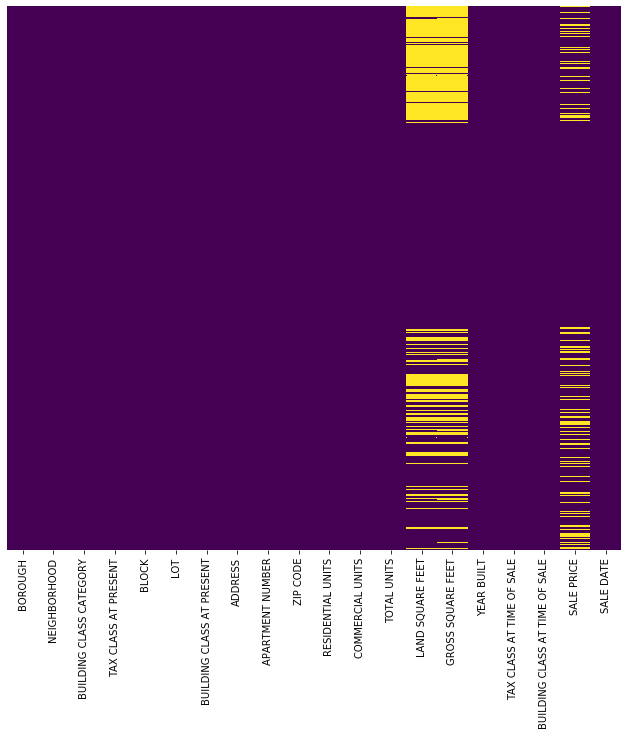

In [18]:
plt.figure(figsize=(11,10))
sns.heatmap(my_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Dropping the rows with no gross, land square area or the ones having area less than 100 as it makes no sense
##### (Alternatively these rows can be filled with mean, median or extrapolating values also if required).
##### (The sales price which are not present (with Na) will not be dropped now as they can be used in test set for certain analysis)

In [19]:
my_data= my_data.dropna(subset=['GROSS SQUARE FEET','LAND SQUARE FEET'])

In [20]:
len(my_data)

56393

Again removing the rows with area less than 100 ft as they make no sense

In [21]:
my_data = my_data[my_data['GROSS SQUARE FEET']>100]

In [22]:
my_data= my_data[my_data['LAND SQUARE FEET']>100]

### Replacing the sales value of Nan with zero for the time being

In [23]:
my_data.loc[:, 'SALE PRICE'] = my_data.loc[:, 'SALE PRICE'].fillna('0')

In [24]:
my_data['SALE PRICE'] = pd.to_numeric(my_data['SALE PRICE'], errors='coerce')

### Visusalizing two area distribution

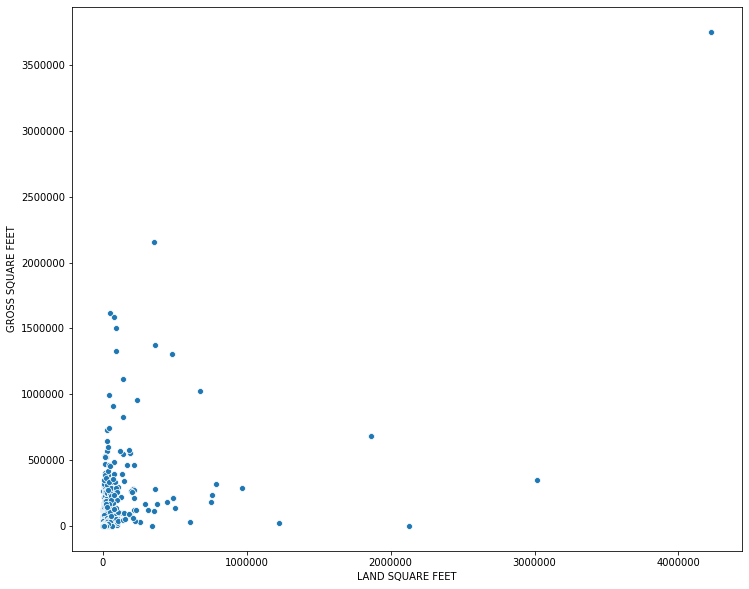

In [25]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=my_data['LAND SQUARE FEET'], y=my_data['GROSS SQUARE FEET'])

### Looking at the ZIP CODE variable

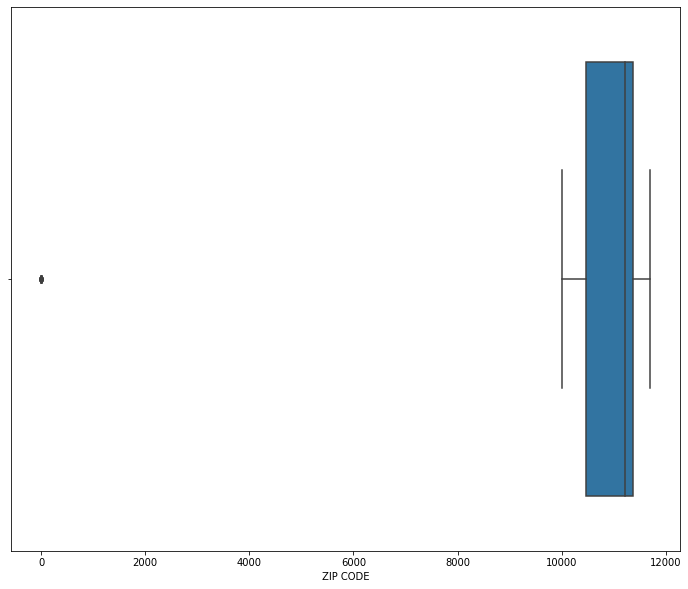

In [26]:
plt.figure(figsize=(12,10))
sns.boxplot(x=my_data['ZIP CODE'])


Checking is the sales price alright where the zip code is zero or not

In [27]:
((my_data['ZIP CODE']==0) & (my_data['SALE PRICE']==0)).to_numpy().nonzero()

(array([ 2825, 38344, 38345, 43873], dtype=int64),)

In [28]:
my_data.iloc[2825]

BOROUGH                                                                     2
NEIGHBORHOOD                                                      CITY ISLAND
BUILDING CLASS CATEGORY           41 TAX CLASS 4 - OTHER                     
TAX CLASS AT PRESENT                                                        4
BLOCK                                                                    5648
LOT                                                                       299
BUILDING CLASS AT PRESENT                                                  Z9
ADDRESS                                                       N/A KING AVENUE
APARTMENT NUMBER                                                             
ZIP CODE                                                                    0
RESIDENTIAL UNITS                                                           0
COMMERCIAL UNITS                                                            1
TOTAL UNITS                                                     

Leaving zero zip codes as is it for now, so that we can remove the respective column if we will use zip code in the future analysis, or may be we can later convert it into categorical variable

### Looking at YEAR BUILT variable

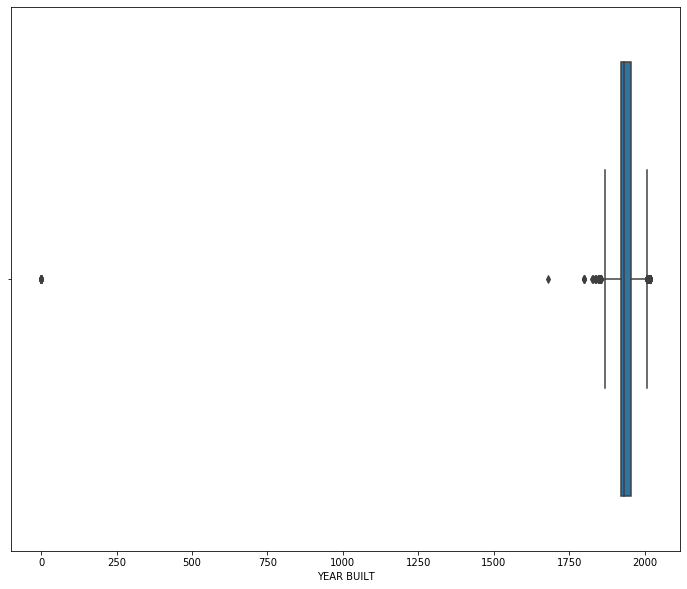

In [29]:
plt.figure(figsize=(12,10))
sns.boxplot(x=my_data['YEAR BUILT'])

Again there are some observations with zero as a year built and some really very old houses. We can check the property sale value with how old the property is so removing year built wich are zero

In [30]:
my_data=my_data[my_data['YEAR BUILT']>100]

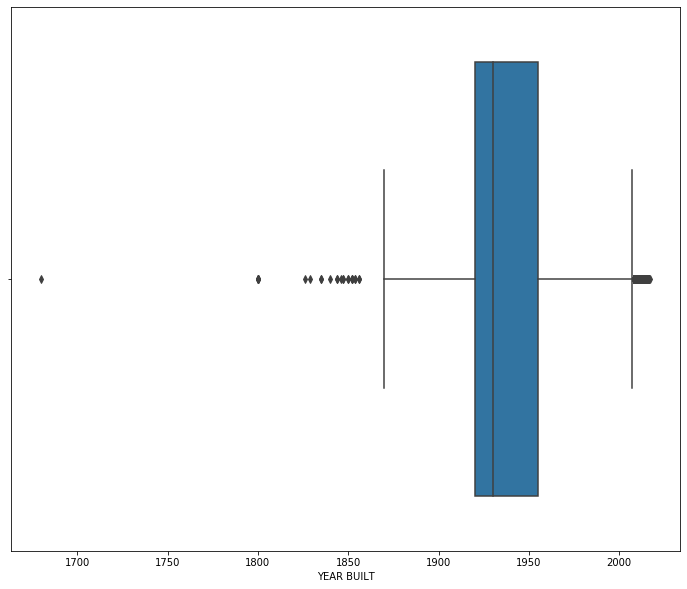

In [31]:
plt.figure(figsize=(12,10))
sns.boxplot(x=my_data['YEAR BUILT'])

There are some observations befor 1700 which might be the case and their presence might have some relation with SALE PRICE so not discarding them for the moment

### Inspecting the Residential, Commercial & Total units

From the primary distribution of these data, the maximum value seems to be high enough to be outliers, but still these can be from tall skyscrapper or some units like them, so not discarding them at the moment.

Furthermore lets check to see if the sum of residential units and commercial units is total unit for all cases or not?

In [32]:
(my_data['TOTAL UNITS'] < my_data['RESIDENTIAL UNITS'] + my_data['COMMERCIAL UNITS']).to_numpy().nonzero()

(array([   59,   872,  1179,  5072,  5967,  9785,  9934,  9938, 10887,
        12455, 12771, 12773, 13877, 14324, 14419, 22728, 22730, 23142,
        26823, 29249, 29413, 30072, 30323, 36507, 37065, 37445, 38986,
        40880, 42844, 44462, 44693, 44699], dtype=int64),)

In [33]:
my_data.iloc[59]

BOROUGH                                                                     1
NEIGHBORHOOD                                                          CHELSEA
BUILDING CLASS CATEGORY           21 OFFICE BUILDINGS                        
TAX CLASS AT PRESENT                                                        4
BLOCK                                                                     790
LOT                                                                        32
BUILDING CLASS AT PRESENT                                                  O1
ADDRESS                                            531-537 AVENUE OF THE AMER
APARTMENT NUMBER                                                             
ZIP CODE                                                                10011
RESIDENTIAL UNITS                                                           1
COMMERCIAL UNITS                                                            1
TOTAL UNITS                                                     

From above observations we cannot conclude them as wrong data but there might be one unit falling in both categories so we change the style of query

The number of total units cannot be less than the number of individual units, so the new query as follow and removing those which might have errors

In [34]:
sum((my_data['TOTAL UNITS'] < my_data['RESIDENTIAL UNITS'] )| (my_data['TOTAL UNITS']< my_data['COMMERCIAL UNITS']))

4

In [35]:
a= ((my_data['TOTAL UNITS'] < my_data['RESIDENTIAL UNITS'] ) | (my_data['TOTAL UNITS']< my_data['COMMERCIAL UNITS'])).to_numpy().nonzero()
a

(array([ 1179,  5072, 26823, 44462], dtype=int64),)

In [36]:
j=a[0]
j

array([ 1179,  5072, 26823, 44462], dtype=int64)

In [37]:
my_data.iloc[5072]

BOROUGH                                                                     2
NEIGHBORHOOD                                         SCHUYLERVILLE/PELHAM BAY
BUILDING CLASS CATEGORY           21 OFFICE BUILDINGS                        
TAX CLASS AT PRESENT                                                        4
BLOCK                                                                    5306
LOT                                                                        31
BUILDING CLASS AT PRESENT                                                  O2
ADDRESS                                              3394 EAST TREMONT AVENUE
APARTMENT NUMBER                                                             
ZIP CODE                                                                10461
RESIDENTIAL UNITS                                                           3
COMMERCIAL UNITS                                                            2
TOTAL UNITS                                                     

In [38]:
my_data = my_data.drop(my_data.index[[1179,5072,26823,44462]])

In [39]:
my_data.iloc[5072] ### Check if the value at index chnages or not

BOROUGH                                                                     2
NEIGHBORHOOD                                         SCHUYLERVILLE/PELHAM BAY
BUILDING CLASS CATEGORY           22 STORE BUILDINGS                         
TAX CLASS AT PRESENT                                                        4
BLOCK                                                                    4169
LOT                                                                        32
BUILDING CLASS AT PRESENT                                                  K1
ADDRESS                                                    1717 CROSBY AVENUE
APARTMENT NUMBER                                                             
ZIP CODE                                                                10461
RESIDENTIAL UNITS                                                           0
COMMERCIAL UNITS                                                            1
TOTAL UNITS                                                     

Again there might be observations with total units equal to zero but there are zero residential and commercial units over there, we leave it as zero for now as it might be only land sale without unit

### Check if there are empty strings in some other columns and replace with 'Missing' values for now 

In [40]:
print((my_data['NEIGHBORHOOD']==' ').sum())

0


In [41]:
print((my_data['BUILDING CLASS CATEGORY']==' ').sum())

0


In [42]:
print((my_data['BUILDING CLASS AT PRESENT']==' ').sum())

0


In [43]:
print((my_data['APARTMENT NUMBER']==' ').sum())

44409


In [44]:
print((my_data['ADDRESS']==' ').sum())

0


In [45]:
print((my_data['BUILDING CLASS AT TIME OF SALE']==' ').sum())

0


In [46]:
my_data['APARTMENT NUMBER']=my_data['APARTMENT NUMBER'].replace(' ','Missing')

In [47]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45000 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           45000 non-null category
NEIGHBORHOOD                      45000 non-null object
BUILDING CLASS CATEGORY           45000 non-null object
TAX CLASS AT PRESENT              45000 non-null object
BLOCK                             45000 non-null int64
LOT                               45000 non-null int64
BUILDING CLASS AT PRESENT         45000 non-null object
ADDRESS                           45000 non-null object
APARTMENT NUMBER                  45000 non-null object
ZIP CODE                          45000 non-null int64
RESIDENTIAL UNITS                 45000 non-null int64
COMMERCIAL UNITS                  45000 non-null int64
TOTAL UNITS                       45000 non-null int64
LAND SQUARE FEET                  45000 non-null float64
GROSS SQUARE FEET                 45000 non-null float64
YEAR BUILT                        45000 non-null int6

In the initial data there were some adresses with possible apartment number after comma

In [48]:
my_data['APT No']=my_data.ADDRESS.str.split(', ',expand=True)[1]# There is a space after comma

In [49]:
my_data['ADDRESS']=my_data.ADDRESS.str.split(',',expand= True)[0]

In [50]:
my_data['APT No'].describe()

count               1
unique              1
top       21ST STREET
freq                1
Name: APT No, dtype: object

After removing the data which were incomplete for the gross square feet and land square feet most of them have been elimated from the data. A quick visual review of orginal data  also suggest the same.So, just droping the new column

In [51]:
my_data.drop('APT No', axis=1,inplace=True)

Here is the code for seperating the apartment number and merging with existing apartment number column if those rows were not removed.

In [52]:
##my_data.loc[my_data['APT No'].isnull(), 'APT No'] = 'Missing'
###a=np.nonzero((my_data['APT No']!='Missing') & (my_data['APARTMENT NUMBER']!='Missing'))
###a
#  j=a[0]
# for i in range(5):
#    k=j[i]
#   my_data.iloc[k,20]='Missing'
# ((my_data['APT No']!='Missing') & (my_data['APARTMENT NUMBER']!='Missing')).sum()
# for i in range(len(my_data)):
#    if my_data.iloc[i,20]=='Missing':
#       my_data.iloc[i,20]=my_data.iloc[i,8]

### Next we will try to visulaize and analyze the categorical and object(data) as much as possible

#### First of all lets summarize the borough variable

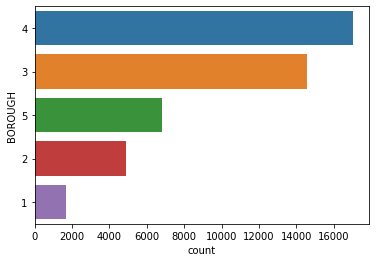

In [53]:
sns.countplot(y='BOROUGH',data=my_data,order=my_data['BOROUGH'].value_counts().index)

Looks fine enough from the general inspection lets move to Neighborhood variable

In [54]:
my_data['NEIGHBORHOOD'].value_counts().head(50)

FLUSHING-NORTH              1297
BEDFORD STUYVESANT          1023
EAST NEW YORK                854
BOROUGH PARK                 846
ASTORIA                      762
FLATBUSH-EAST                740
RICHMOND HILL                725
GREAT KILLS                  672
BAYSIDE                      659
CANARSIE                     655
BUSHWICK                     641
ST. ALBANS                   595
SO. JAMAICA-BAISLEY PARK     586
CROWN HEIGHTS                541
SOUTH OZONE PARK             533
OZONE PARK                   529
QUEENS VILLAGE               529
SPRINGFIELD GARDENS          513
BENSONHURST                  486
SOUTH JAMAICA                481
FLUSHING-SOUTH               480
BAY RIDGE                    480
CORONA                       454
HOLLIS                       451
ELMHURST                     447
SUNSET PARK                  438
MIDDLE VILLAGE               435
SHEEPSHEAD BAY               432
GRAVESEND                    431
JACKSON HEIGHTS              405
WOODHAVEN 

It seems like its inefficient to convert the data in categorical for now we leave it as it is. There are not significant frequency differences with differnt unique values

### Lets work on 'Buiding Class Category' variable lets convert into the categorical data by selcting some top frequent categories,less frequent categories simplified under class 'Other'

In [55]:
temp = my_data['BUILDING CLASS CATEGORY'].value_counts()
print(temp)

01 ONE FAMILY DWELLINGS                         18023
02 TWO FAMILY DWELLINGS                         15633
03 THREE FAMILY DWELLINGS                        4318
07 RENTALS - WALKUP APARTMENTS                   3372
22 STORE BUILDINGS                                914
14 RENTALS - 4-10 UNIT                            660
08 RENTALS - ELEVATOR APARTMENTS                  357
21 OFFICE BUILDINGS                               341
30 WAREHOUSES                                     322
29 COMMERCIAL GARAGES                             294
27 FACTORIES                                      194
37 RELIGIOUS FACILITIES                            96
26 OTHER HOTELS                                    75
33 EDUCATIONAL FACILITIES                          68
32 HOSPITAL AND HEALTH FACILITIES                  57
23 LOFT BUILDINGS                                  44
10 COOPS - ELEVATOR APARTMENTS                     43
41 TAX CLASS 4 - OTHER                             36
35 INDOOR PUBLIC AND CULTURA

In [56]:
temp1 = temp[:6].index # Getting top 6 values
print(temp1)

Index(['01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWELLINGS                  ',
       '07 RENTALS - WALKUP APARTMENTS             ',
       '22 STORE BUILDINGS                         ',
       '14 RENTALS - 4-10 UNIT                     '],
      dtype='object')


In [57]:
my_data['BUILDING CLASS CATEGORY'] = my_data['BUILDING CLASS CATEGORY'].where(my_data['BUILDING CLASS CATEGORY'].isin(temp1),'Other')
### The above step assigns other to less frequent categories beside the top 6 mentioned above

In [58]:
my_data['BUILDING CLASS CATEGORY']=my_data['BUILDING CLASS CATEGORY'].astype('category')

In [59]:
my_data['BUILDING CLASS CATEGORY'].value_counts()

01 ONE FAMILY DWELLINGS                        18023
02 TWO FAMILY DWELLINGS                        15633
03 THREE FAMILY DWELLINGS                       4318
07 RENTALS - WALKUP APARTMENTS                  3372
Other                                           2080
22 STORE BUILDINGS                               914
14 RENTALS - 4-10 UNIT                           660
Name: BUILDING CLASS CATEGORY, dtype: int64

Next lets look at Tax Class at Present

In [60]:
my_data['TAX CLASS AT PRESENT'].value_counts()

1     38014
4      2516
2A     2481
2      1198
2B      783
2C        8
Name: TAX CLASS AT PRESENT, dtype: int64

There were few other categories initially but along with the cleaning of data these categories might have been reduced

Same process of seperating into high frequent category as above.

In [61]:
temp = my_data['TAX CLASS AT PRESENT'].value_counts()

In [62]:
temp1 = temp[:4].index # Getting top 4 values

In [63]:
my_data['TAX CLASS AT PRESENT'] = my_data['TAX CLASS AT PRESENT'].where(my_data['TAX CLASS AT PRESENT'].isin(temp1),'2B & 2C')

In [64]:
my_data['TAX CLASS AT PRESENT'] = my_data['TAX CLASS AT PRESENT'].astype('category')

### Lets look at the BUILDING CLASS AT PRESENT variable 

In [65]:
my_data['BUILDING CLASS AT PRESENT'].value_counts().head(25)

A1    6690
A5    5595
B2    4831
B1    4695
C0    4314
B3    3800
A2    2800
B9    1523
A9    1390
C3    1087
C1     804
C2     799
S2     796
A0     469
A3     379
K1     356
S1     352
C7     330
K4     324
A4     228
S9     224
E1     217
S3     182
K2     172
C4     172
Name: BUILDING CLASS AT PRESENT, dtype: int64

Similar steps as above variables are to be followed.

In [66]:
temp = my_data['BUILDING CLASS AT PRESENT'].value_counts()

In [67]:
temp1 = temp[:10].index # Getting top 10 values

In [68]:
my_data['BUILDING CLASS AT PRESENT'] = my_data['BUILDING CLASS AT PRESENT'].where(my_data['BUILDING CLASS AT PRESENT'].isin(temp1),'Other')

In [69]:
my_data['BUILDING CLASS AT PRESENT'] = my_data['BUILDING CLASS AT PRESENT'].astype('category')

### Next we will look at TAX CLASS AT THE TIME OF SALE

In [70]:
my_data['TAX CLASS AT TIME OF SALE'].value_counts()

1    38012
2     4467
4     2521
Name: TAX CLASS AT TIME OF SALE, dtype: int64

In [71]:
my_data['TAX CLASS AT TIME OF SALE']=my_data['TAX CLASS AT TIME OF SALE'].astype('category')

### Next we will looka t BUILDING CLASS AT TIME OF SALE

In [72]:
my_data['BUILDING CLASS AT TIME OF SALE'].value_counts().head(25)

A1    6685
A5    5582
B2    4826
B1    4692
C0    4318
B3    3796
A2    2840
B9    1522
A9    1404
C3    1089
C1     804
C2     799
S2     797
A0     429
A3     378
S1     353
K1     353
C7     329
K4     325
A4     227
S9     224
E1     217
S3     182
K2     171
C4     171
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

In [73]:
temp = my_data['BUILDING CLASS AT TIME OF SALE'].value_counts()

In [74]:
temp1 = temp[:10].index # Getting top 10 values

In [75]:
my_data['BUILDING CLASS AT TIME OF SALE'] = my_data['BUILDING CLASS AT TIME OF SALE'].where(my_data['BUILDING CLASS AT TIME OF SALE'].isin(temp1),'Other')

In [76]:
my_data['BUILDING CLASS AT TIME OF SALE'] = my_data['BUILDING CLASS AT TIME OF SALE'].astype('category')

In [77]:
my_data['BUILDING CLASS AT TIME OF SALE'].value_counts()

Other    8246
A1       6685
A5       5582
B2       4826
B1       4692
C0       4318
B3       3796
A2       2840
B9       1522
A9       1404
C3       1089
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

### Lets again look back to ZIP CODE Variable

In [78]:
my_data['ZIP CODE'].value_counts().head(25)

10314    1197
11234    1024
10312    1008
10306     901
11207     720
11385     714
11208     688
11434     680
11221     666
11236     660
10469     634
10305     592
11203     581
11229     577
11204     574
11420     553
10309     530
11413     524
11233     521
11223     518
10304     513
11412     510
10466     507
11357     504
11219     473
Name: ZIP CODE, dtype: int64

To make it a categorical data, first we should understand how the zip code is associated with a place, so leaving it as it is for now.

#### Final note
The SALE PRICE variable with Nan has been converted to zero and there are other sale price which are zero or which are less than some reasonable values, these can be splitted into test sets.

The area values less than certain number and missing values have been removed from the data, another method would have been to adjust using the mean or median or so on which we didinot do in this data analysis.

Correlation is not a big concren for our preliminary data because correlation doesnot matter in machine learning as far as i know.

### Checking sale price data for now

In [79]:
(my_data['SALE PRICE']<100000).sum()

17114

In [80]:
(my_data['SALE PRICE']<10000).sum()

16681

In [81]:
len(my_data)

45000

Removing the data reduces the data by much so leaving it as it is for now.

### Saving the dataframe to csv

In [82]:
my_data.to_csv(r'C:\Users\Niranjan.p\Desktop\Home work and assignments\machine learning\my_data.csv')


In [83]:
my_data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,Other,153 AVENUE B,Missing,10009,5,0,5,1633.0,6440.0,1900,2,Other,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,Other,234 EAST 4TH STREET,Missing,10009,28,3,31,4616.0,18690.0,1900,2,Other,0.0,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,Other,197 EAST 3RD STREET,Missing,10009,16,1,17,2212.0,7803.0,1900,2,Other,0.0,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B & 2C,402,21,Other,154 EAST 7TH STREET,Missing,10009,10,0,10,2272.0,6794.0,1913,2,Other,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,Other,301 EAST 10TH STREET,Missing,10009,6,0,6,2369.0,4615.0,1900,2,Other,8000000.0,2016-11-17
